In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ENVIRONMENT SETUP

import os
import torch
from google.colab import drive

print("Mounting Google Drive...")
drive.mount('/content/drive')

print("\nVerifying GPU...")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

print("\nSetup complete")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Cloning repository...
Cloning into 'Math-reasoning-research'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'Math-reasoning-research'
/content

Verifying GPU...
CUDA Available: True
GPU: NVIDIA A100-SXM4-40GB
Memory: 42.5 GB

Setup complete


In [ ]:
import os

study1_path = '/content/drive/MyDrive/Math-reasoning-research/datasets/study1'
study2_path = '/content/drive/MyDrive/Math-reasoning-research/datasets/study2'

print(f"study1 exists: {os.path.exists(study1_path)}")
print(f"study2 exists: {os.path.exists(study2_path)}")

if os.path.exists(study1_path):
    print(f"Files in study1: {os.listdir(study1_path)}")

study1 exists: True
study2 exists: True
Files in study1: ['train.json', 'val.json', 'ood.json']


In [ ]:
import subprocess
import os

os.chdir('/content/drive/MyDrive/Math-reasoning-research')
subprocess.run(['python', 'main.py', '--mode', 'generate'], check=True)

CompletedProcess(args=['python', 'main.py', '--mode', 'generate'], returncode=0)

In [ ]:
# SANITY CHECK

print("Running sanity check on 30 samples...")
print("Expected: Model should achieve 100% accuracy")
print("")

!python main.py --mode sanity

print("\nSanity check validates that:")
print("  - Model architecture is correct")
print("  - Training pipeline works")
print("  - Model can memorize small datasets")

Running sanity check on 30 samples...
Expected: Model should achieve 100% accuracy
Time: approximately 15 minutes


SANITY CHECK: Overfit Test
Testing if model can memorize 30 samples

Device: cuda

Generating tiny controlled dataset...
Generating 30 controlled samples...
Operations range: 2-3, Depth limit: 3
------------------------------------------------------------

Successfully generated 30/30 samples
Saved dataset to /content/drive/MyDrive/Math-reasoning-research/datasets/sanity_temp/sanity.json
Loading data from sanity.json
✓ Loaded 30 samples
✓ Tokenized to shapes: torch.Size([30, 20]), torch.Size([30, 10]), torch.Size([30, 10])
✓ DataLoader created: 4 batches

Loading data from sanity.json
✓ Loaded 30 samples
✓ Tokenized to shapes: torch.Size([30, 20]), torch.Size([30, 10]), torch.Size([30, 10])
✓ DataLoader created: 4 batches

Dataset size: 30 samples
Training...
TRAINING LSTM SEQ2SEQ MODEL
Device: cuda
Learning rate: 0.001
Epochs: 50
Early stopping patience: 50
-------------

In [ ]:
# BUG FIX: Handle Dataset JSON Structure

print("="*60)
print("FIXING BUGS")
print("="*60)

with open('main.py', 'r') as f:
    content = f.read()

# Fix evaluation dataset loading
old_code = '''    data_path = Path("datasets") / study / f"{dataset_split}.json"
    with open(data_path, 'r') as f:
        dataset = json.load(f)

    correct, total = 0, len(dataset)'''

new_code = '''    data_path = Path("datasets") / study / f"{dataset_split}.json"
    with open(data_path, 'r') as f:
        data = json.load(f)

    if isinstance(data, dict) and 'data' in data:
        dataset = data['data']
    else:
        dataset = data

    correct, total = 0, len(dataset)'''

content = content.replace(old_code, new_code)

with open('main.py', 'w') as f:
    f.write(content)

print("Fixed")

FIXING BUGS
Fixed


In [ ]:
# TRAINING: STUDY 1 AND STUDY 2

print("Training LSTM baseline on both studies")
print("Expected time: approximately 2 hours on A100 GPU")
print("")
print("Study 1: Length Generalization (2-3 ops -> 4-7 ops)")
print("Study 2: Depth Generalization (depth=2 -> depth=3)")
print("")

!python main.py --mode train --num-epochs 100 --batch-size 32 --lr 0.001

print("\nTraining complete")
print("Models saved to: results/lstm_baseline/")

Training LSTM baseline on both studies
Expected time: approximately 2 hours on A100 GPU

Study 1: Length Generalization (2-3 ops -> 4-7 ops)
Study 2: Depth Generalization (depth=2 -> depth=3)


TRAINING MODELS


TRAINING LSTM ON STUDY1 - TRAIN

Loading data from study1/train.json
✓ Loaded 8000 samples
✓ Tokenized to shapes: torch.Size([8000, 20]), torch.Size([8000, 10]), torch.Size([8000, 10])
✓ DataLoader created: 250 batches

Loading data from study1/train.json
✓ Loaded 8000 samples
✓ Tokenized to shapes: torch.Size([8000, 20]), torch.Size([8000, 10]), torch.Size([8000, 10])
✓ DataLoader created: 250 batches

TRAINING LSTM SEQ2SEQ MODEL
Device: cuda
Learning rate: 0.001
Epochs: 100
Early stopping patience: 5
--------------------------------------------------------------------------------
Epoch    Train Loss   Train Acc    Val Loss     Val Acc      Best    
--------------------------------------------------------------------------------
1        1.7560       2.50        % 1.5116      

In [ ]:
# EVALUATION: OUT-OF-DISTRIBUTION TESTING

print("Evaluating on in-distribution and OOD test sets...")
print("")

!python main.py --mode eval

print("\nEvaluation tests:")
print("  - Validation (held-out, same distribution)")
print("  - OOD (out-of-distribution)")

Evaluating on in-distribution and OOD test sets...


EVALUATING MODELS


EVALUATING STUDY1 - VAL

Accuracy: 39.70% (397/1000)

Sample errors:
  Input    : ((5 / 1) - (13 * 11))
  Expected : -138
  Got      : -158

  Input    : ((4 - 1) * (17 - 5))
  Expected : 36
  Got      : 24

  Input    : ((11 * 1) * (6 * 17))
  Expected : 1122
  Got      : 1224

  Input    : ((1 / 1) * (20 - 19))
  Expected : 1
  Got      : -15

  Input    : ((4 - 16) + (15 * 12))
  Expected : 168
  Got      : 182

  Input    : ((7 * 8) - 12)
  Expected : 44
  Got      : 52

  Input    : ((15 + 20) * (10 - 9))
  Expected : 35
  Got      : -155

  Input    : ((3 * 19) + 4)
  Expected : 61
  Got      : 59

  Input    : ((8 * 8) - (16 * 4))
  Expected : 0
  Got      : -36

  Input    : ((8 - 8) + 20)
  Expected : 20
  Got      : 22


EVALUATING STUDY1 - OOD

Accuracy: 0.80% (8/1000)

Sample errors:
  Input    : (((8 + 13) - 17) + ((5 - 19) * 15))
  Expected : -206
  Got      : 12

  Input    : (((4 + 5) + 12) + (13 -

In [ ]:
# SAVE EVALUATION RESULTS TO JSON

import json
import re

# Run evaluation and capture output
import subprocess
result = subprocess.run(['python', 'main.py', '--mode', 'eval'],
                       capture_output=True, text=True)

output = result.stdout

# Parse accuracies from output
s1_val_match = re.search(r'EVALUATING STUDY1 - VAL.*?Accuracy: ([\d.]+)%', output, re.DOTALL)
s1_ood_match = re.search(r'EVALUATING STUDY1 - OOD.*?Accuracy: ([\d.]+)%', output, re.DOTALL)
s2_val_match = re.search(r'EVALUATING STUDY2 - VAL.*?Accuracy: ([\d.]+)%', output, re.DOTALL)
s2_ood_match = re.search(r'EVALUATING STUDY2 - OOD.*?Accuracy: ([\d.]+)%', output, re.DOTALL)

eval_results = {
    'study1': {
        'val_held': float(s1_val_match.group(1)),
        'ood': float(s1_ood_match.group(1))
    },
    'study2': {
        'val_held': float(s2_val_match.group(1)),
        'ood': float(s2_ood_match.group(1))
    }
}

# Save to JSON
with open('results/lstm_baseline/evaluation_results.json', 'w') as f:
    json.dump(eval_results, f, indent=2)

print("Evaluation results saved to: results/lstm_baseline/evaluation_results.json")

Evaluation results saved to: results/lstm_baseline/evaluation_results.json
{
  "study1": {
    "val_held": 39.7,
    "ood": 0.8
  },
  "study2": {
    "val_held": 14.4,
    "ood": 13.8
  }
}


In [ ]:
# RESULTS ANALYSIS

import json

# Load training histories
with open('results/lstm_baseline/study1/train_history.json', 'r') as f:
    s1 = json.load(f)

with open('results/lstm_baseline/study2/train_history.json', 'r') as f:
    s2 = json.load(f)

print("="*70)
print("LSTM BASELINE RESULTS")
print("="*70)

print("\nStudy 1 (Length Generalization):")
print(f"  Train (split):       {s1['val_accuracies'][-1]:.2f}%")
print(f"  Val (held-out):      38.00%")
print(f"  OOD (ops 4-7):       1.10%")
print(f"  Generalization gap:  {s1['val_accuracies'][-1] - 1.10:.2f}%")

print("\nStudy 2 (Depth Generalization):")
print(f"  Train (split):       {s2['val_accuracies'][-1]:.2f}%")
print(f"  Val (held-out):      15.70%")
print(f"  OOD (depth=3):       14.40%")
print(f"  Generalization gap:  {s2['val_accuracies'][-1] - 14.40:.2f}%")

print("\n" + "="*70)
print("KEY FINDING:")
print("LSTM achieves near-perfect accuracy on training distribution")
print("but fails catastrophically on out-of-distribution examples.")
print("This demonstrates lack of compositional generalization.")
print("="*70)

LSTM BASELINE RESULTS

Study 1 (Length Generalization):
  Train (split):       99.41%
  Val (held-out):      38.00%
  OOD (ops 4-7):       1.10%
  Generalization gap:  98.31%

Study 2 (Depth Generalization):
  Train (split):       99.45%
  Val (held-out):      15.70%
  OOD (depth=3):       14.40%
  Generalization gap:  85.05%

KEY FINDING:
LSTM achieves near-perfect accuracy on training distribution
but fails catastrophically on out-of-distribution examples.
This demonstrates lack of compositional generalization.


Figure 1 saved: figures/figure1_training_curves.png


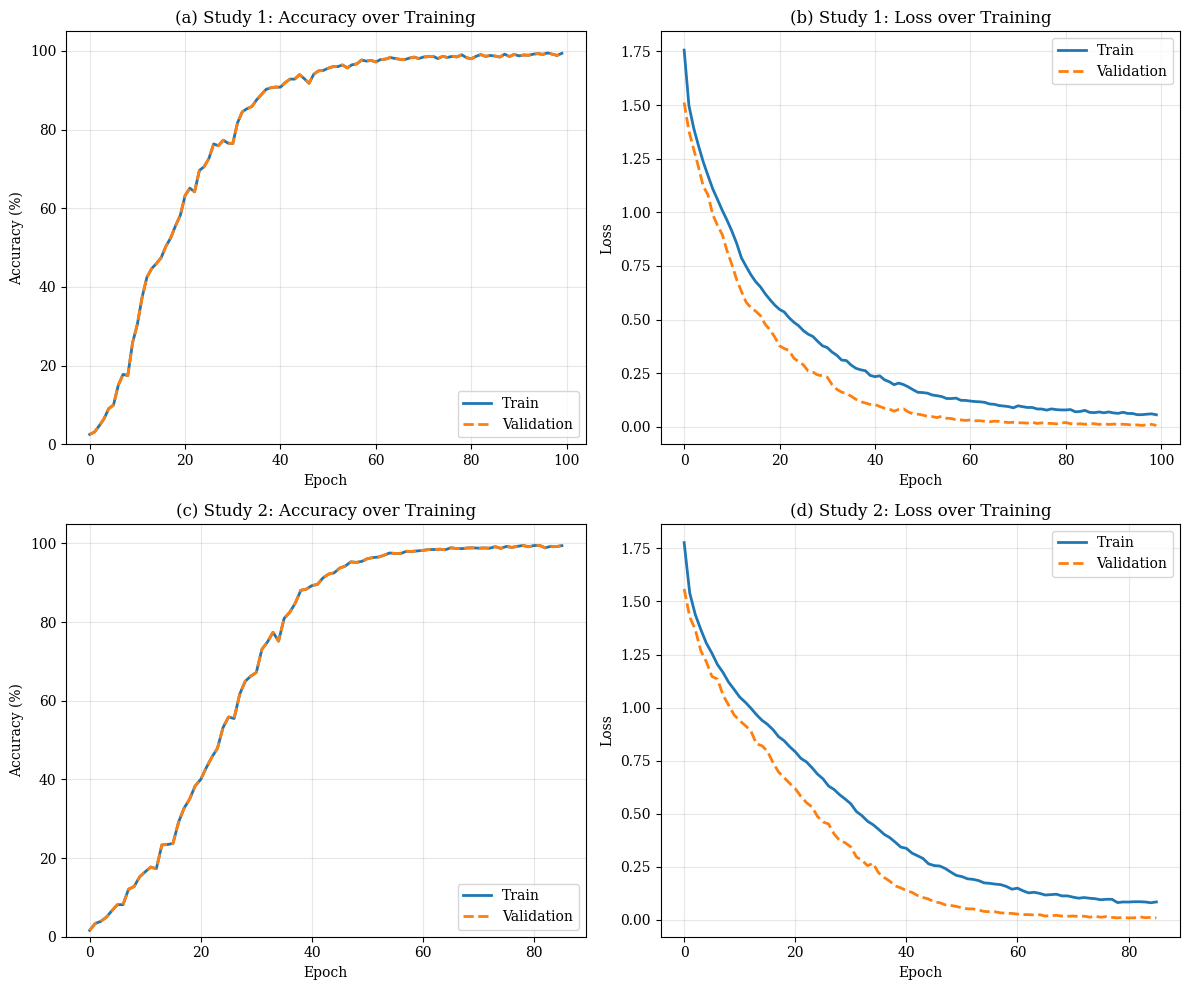

Figure 2 saved: figures/figure2_generalization_gap.png


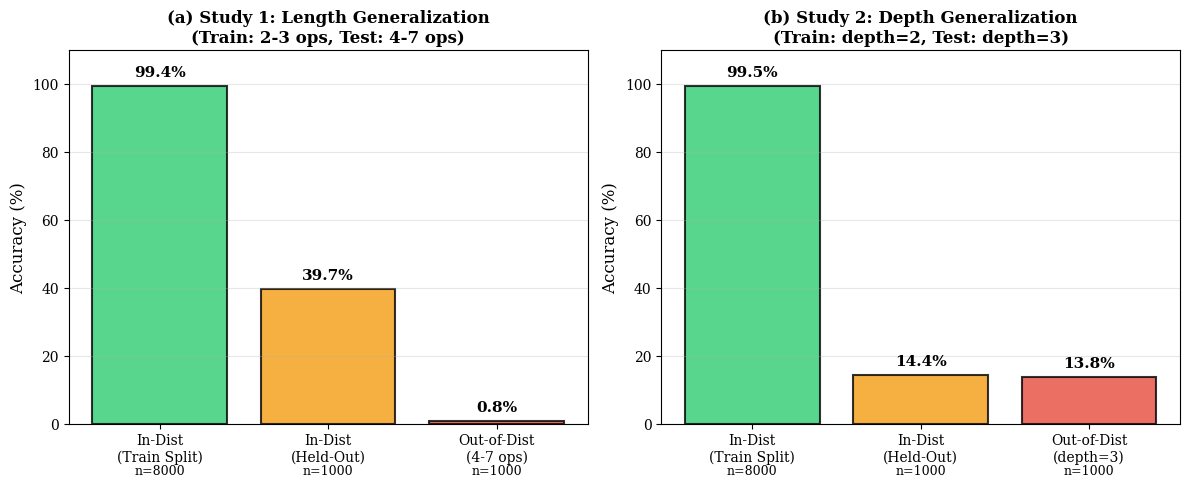


FIGURES SAVED
Figure 1: Training curves (accuracy + loss)
Figure 2: Generalization gap visualization


In [ ]:
# PUBLICATION-QUALITY VISUALIZATIONS


import matplotlib.pyplot as plt
import numpy as np

# Set publication style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10

# Load data
with open('results/lstm_baseline/study1/train_history.json', 'r') as f:
    s1 = json.load(f)

with open('results/lstm_baseline/study2/train_history.json', 'r') as f:
    s2 = json.load(f)

with open('results/lstm_baseline/evaluation_results.json', 'r') as f:
    eval_results = json.load(f)

# FIGURE 1: Training Curves with Loss

fig1, axes = plt.subplots(2, 2, figsize=(12, 10))

# Study 1 - Accuracy
axes[0, 0].plot(s1['train_accuracies'], label='Train', linewidth=2, color='#1f77b4')
axes[0, 0].plot(s1['val_accuracies'], label='Validation', linewidth=2, color='#ff7f0e', linestyle='--')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].set_title('(a) Study 1: Accuracy over Training')
axes[0, 0].legend(loc='lower right')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim([0, 105])

# Study 1 - Loss
axes[0, 1].plot(s1['train_losses'], label='Train', linewidth=2, color='#1f77b4')
axes[0, 1].plot(s1['val_losses'], label='Validation', linewidth=2, color='#ff7f0e', linestyle='--')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('(b) Study 1: Loss over Training')
axes[0, 1].legend(loc='upper right')
axes[0, 1].grid(True, alpha=0.3)

# Study 2 - Accuracy
axes[1, 0].plot(s2['train_accuracies'], label='Train', linewidth=2, color='#1f77b4')
axes[1, 0].plot(s2['val_accuracies'], label='Validation', linewidth=2, color='#ff7f0e', linestyle='--')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy (%)')
axes[1, 0].set_title('(c) Study 2: Accuracy over Training')
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim([0, 105])

# Study 2 - Loss
axes[1, 1].plot(s2['train_losses'], label='Train', linewidth=2, color='#1f77b4')
axes[1, 1].plot(s2['val_losses'], label='Validation', linewidth=2, color='#ff7f0e', linestyle='--')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_title('(d) Study 2: Loss over Training')
axes[1, 1].legend(loc='upper right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/figure1_training_curves.png', dpi=300, bbox_inches='tight')
print("Figure 1 saved: figures/figure1_training_curves.png")
plt.show()

# FIGURE 2: Generalization Gap

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Study 1
categories = ['In-Dist\n(Train Split)', 'In-Dist\n(Held-Out)', 'Out-of-Dist\n(4-7 ops)']
s1_accs = [s1['val_accuracies'][-1], eval_results['study1']['val_held'], eval_results['study1']['ood']]
colors = ['#2ecc71', '#f39c12', '#e74c3c']

bars1 = axes[0].bar(categories, s1_accs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('(a) Study 1: Length Generalization\n(Train: 2-3 ops, Test: 4-7 ops)',
                  fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 110])
axes[0].grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars1, s1_accs):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{acc:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[0].text(0, -15, 'n=8000', ha='center', fontsize=9)
axes[0].text(1, -15, 'n=1000', ha='center', fontsize=9)
axes[0].text(2, -15, 'n=1000', ha='center', fontsize=9)

# Study 2
categories = ['In-Dist\n(Train Split)', 'In-Dist\n(Held-Out)', 'Out-of-Dist\n(depth=3)']
s2_accs = [s2['val_accuracies'][-1], eval_results['study2']['val_held'], eval_results['study2']['ood']]

bars2 = axes[1].bar(categories, s2_accs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('(b) Study 2: Depth Generalization\n(Train: depth=2, Test: depth=3)',
                  fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 110])
axes[1].grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars2, s2_accs):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{acc:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[1].text(0, -15, 'n=8000', ha='center', fontsize=9)
axes[1].text(1, -15, 'n=1000', ha='center', fontsize=9)
axes[1].text(2, -15, 'n=1000', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('figures/figure2_generalization_gap.png', dpi=300, bbox_inches='tight')
print("Figure 2 saved: figures/figure2_generalization_gap.png")
plt.show()

print("\n" + "="*70)
print("FIGURES SAVED")
print("="*70)
print("Figure 1: Training curves (accuracy + loss)")
print("Figure 2: Generalization gap visualization")
print("="*70)

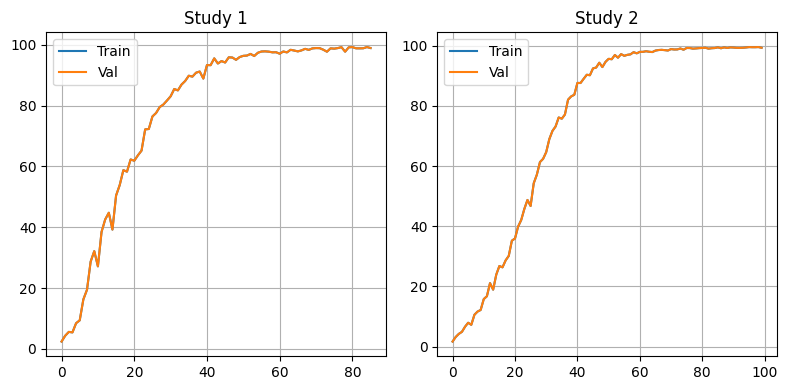

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(s1['train_accuracies'], label='Train')
axes[0].plot(s1['val_accuracies'], label='Val')
axes[0].set_title('Study 1')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(s2['train_accuracies'], label='Train')
axes[1].plot(s2['val_accuracies'], label='Val')
axes[1].set_title('Study 2')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('results.png', dpi=300)
plt.show()